# Part 2: Word cloud

In [1]:
# -*- coding: utf-8 -*-
# goto https://github.com/n-lo/Tweets_analysis_tryout for other parts
%matplotlib inline

from __future__ import print_function
import pprint, datetime
import pandas as pd
import numpy as np
import gensim, re
from dateutil import parser
from ggplot import *

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 14, 10

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# e.g. logging.info("%i tweets found..." % len(df))

pp = pprint.PrettyPrinter(indent=4)

### This is part two of data exploration, see part one for quick data look and sentiment analysis.

## Load in data

Dataset contains Tweets between 09-08-2016 and 23-08-2016, with sentiment score from part one sentiment analysis.  

Load dataframe from hdf5 file (see db2df.ipynb for loading data from MongoDB to dataframe)

In [2]:
print("Load df from hdf5 file.")
hdf = pd.HDFStore('onp_sentiment.h5')
df = hdf['df']
hdf.close()
print("%d Tweets loaded." % len(df))

Load df from hdf5 file.
9486 Tweets loaded.


#### Note:
When the data set gets too big, can try random select samples:  

from sklearn.cross_validation import train_test_split  
import random  
random.seed(1234)  
train, test = train_test_split(df, test_size = 0.5)  
del(df)  
df = train  

## Some word metrics...

like the good old typical word cloud? should also try topic modelling

#### Collect all words from Tweets and tokenize into a flattened list

In [3]:
def remove_junk(text):
    text = text.lower()
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"@+", " ", text)
    return text

In [4]:
sw = set(gensim.parsing.preprocessing.STOPWORDS)
my_sw = ['http', 'https', 'RT']

In [5]:
def split_wd(text, stopwords=sw):
    new_sw = set(sw)
    new_sw |= set(my_sw)
    return [wd
            for wd in gensim.utils.tokenize(text, lower=True)
            if wd not in new_sw and len(wd) > 3]

In [6]:
words_onp = []

# = 0
for index, row in df.iterrows():
    text = row['text']
    text = remove_junk(text)
    tokens = split_wd(text, sw)

    words_onp.append(tokens)
#   n += 1
#   if n >= 10:
#       break

In [7]:
# flatten the list
words_onp_list = [w for sublist in words_onp for w in sublist]

#### Word frequency

In [8]:
from collections import Counter
counts = Counter(words_onp_list)
counts.most_common(10)

[(u'pauline', 7220),
 (u'hanson', 7028),
 (u'nation', 2371),
 (u'auspol', 1957),
 (u'roberts', 1706),
 (u'malcolm', 1648),
 (u'right', 1357),
 (u'church', 1335),
 (u'muslims', 1135),
 (u'australian', 1101)]

### Word clouds

In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# since 2016 Federal election is over, let's filter out election related words
my_stopwords = {'ausvotes', 'vote', 'election', 'candidate', 'auspol'}
STOPWORDS = STOPWORDS.union(my_stopwords)

In [10]:
from scipy.ndimage import imread

img_mask = imread('AUSTRALIA_MAP_MASK.png', flatten = True, mode = "L")

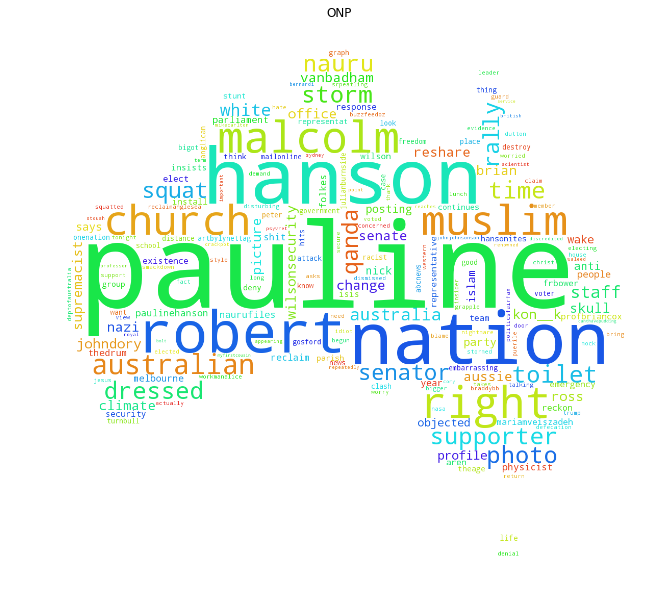

In [12]:
words = " ".join(words_onp_list)

wc = WordCloud(stopwords = STOPWORDS, background_color = 'white', mask = img_mask, 
               width = 1600, height = 1000).generate(words)
plt.imshow(wc)
plt.axis('off')
plt.title("ONP")
plt.savefig('wc_onp.png', dpi=300)
plt.show()

#### Since the word 'Pauline Hanson' was used as one of the search parameters, let's add that to the stopwords list.

In [13]:
# other stopwords specific to this dataset
other_stopwords = {'pauline', 'hanson'}
more_stopwords = STOPWORDS.union(other_stopwords)

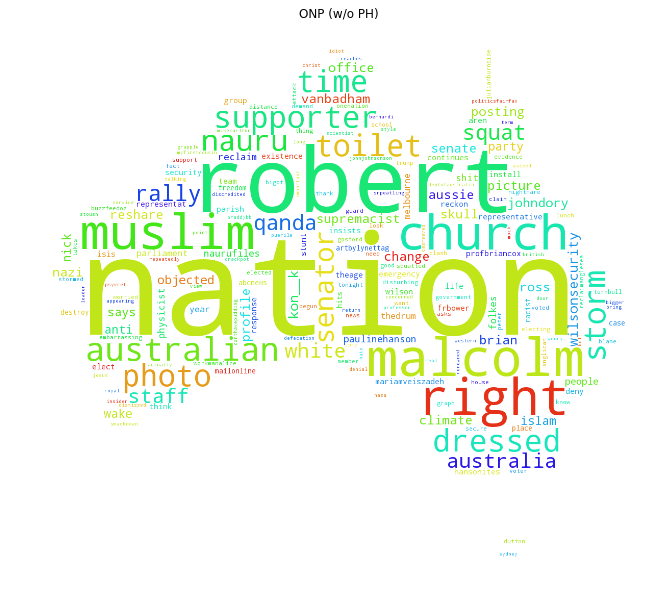

In [14]:
words = " ".join(words_onp_list)

wc = WordCloud(stopwords = more_stopwords, background_color = 'white', mask = img_mask, 
               width = 1600, height = 1000).generate(words)
plt.imshow(wc)
plt.axis('off')
plt.title("ONP (w/o PH)")
plt.savefig('wc_onp_wo_ph.png', dpi=300)
plt.show()

### Word clouds with sentiment categories

#### For positive sentiment

In [15]:
words_onp_pos = []

# = 0
for index, row in df.iterrows():
    if row['sentiment_afinn'] > 0:
        text = row['text']
        text = remove_junk(text)
        tokens = split_wd(text, sw)

        words_onp_pos.append(tokens)
#   n += 1
#   if n >= 10:
#       break

#### For negative sentiment

In [16]:
words_onp_neg = []

# = 0
for index, row in df.iterrows():
    if row['sentiment_afinn'] < 0:
        text = row['text']
        text = remove_junk(text)
        tokens = split_wd(text, sw)

        words_onp_neg.append(tokens)
#   n += 1
#   if n >= 10:
#       break

#### For neutral sentiment

In [17]:
words_onp_neu = []

# = 0
for index, row in df.iterrows():
    if row['sentiment_afinn'] == 0:
        text = row['text']
        text = remove_junk(text)
        tokens = split_wd(text, sw)

        words_onp_neu.append(tokens)
#   n += 1
#   if n >= 10:
#       break

#### Flatten the word lists

In [18]:
words_onp_pos_list = [w for sublist in words_onp_pos for w in sublist]
words_onp_neg_list = [w for sublist in words_onp_neg for w in sublist]
words_onp_neu_list = [w for sublist in words_onp_neu for w in sublist]

#### Generate the word clouds based on sentiment score

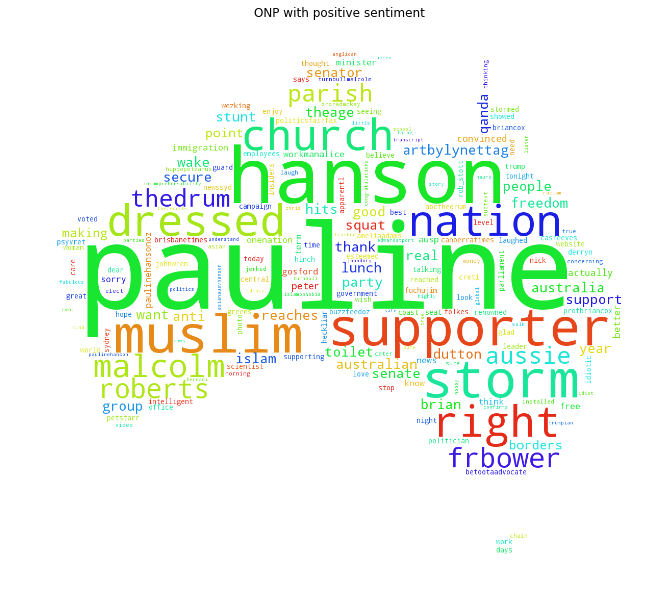

In [19]:
words = " ".join(words_onp_pos_list)

wc = WordCloud(stopwords = STOPWORDS, background_color = 'white', mask = img_mask, 
               width = 1600, height = 1000).generate(words)
plt.imshow(wc)
plt.axis('off')
plt.title("ONP with positive sentiment")
plt.savefig('wc_onp_pos.png', dpi=300)
plt.show()

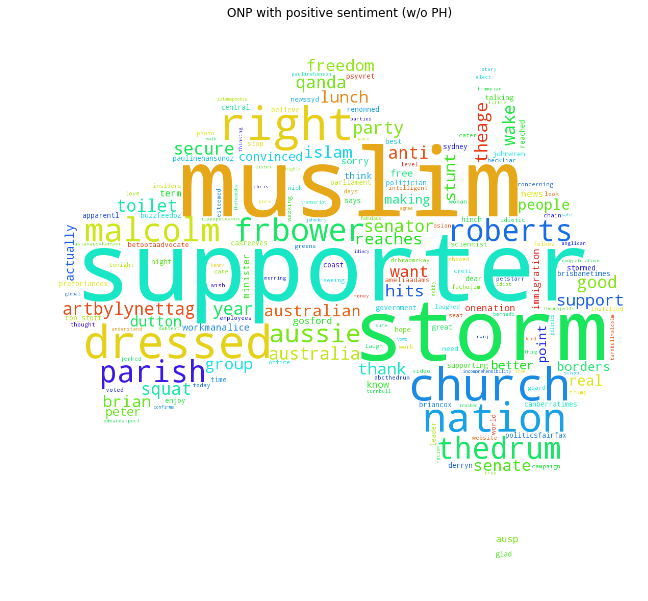

In [21]:
words = " ".join(words_onp_pos_list)

wc = WordCloud(stopwords = more_stopwords, background_color = 'white', mask = img_mask, 
               width = 1600, height = 1000).generate(words)
plt.imshow(wc)
plt.axis('off')
plt.title("ONP with positive sentiment (w/o PH)")
plt.savefig('wc_onp_pos_wo_ph.png', dpi=300)
plt.show()

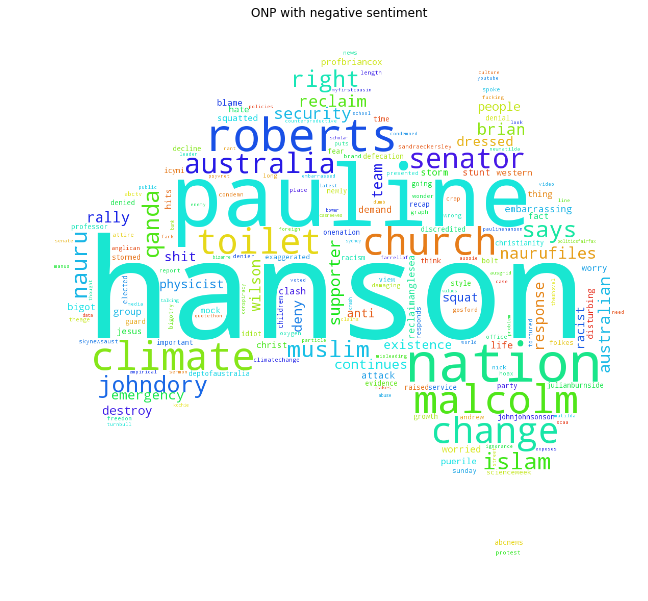

In [22]:
words = " ".join(words_onp_neg_list)

wc = WordCloud(stopwords = STOPWORDS, background_color = 'white', mask = img_mask, 
               width = 1600, height = 1000).generate(words)
plt.imshow(wc)
plt.axis('off')
plt.title("ONP with negative sentiment")
plt.savefig('wc_onp_neg.png', dpi=300)
plt.show()

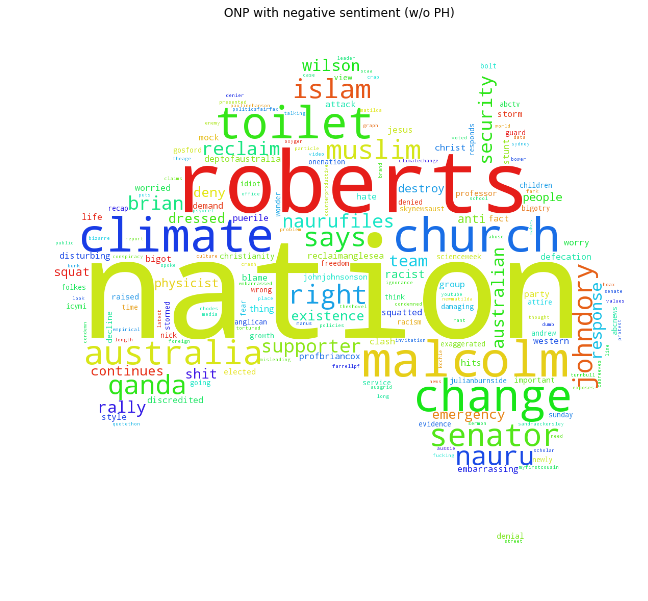

In [23]:
words = " ".join(words_onp_neg_list)

wc = WordCloud(stopwords = more_stopwords, background_color = 'white', mask = img_mask, 
               width = 1600, height = 1000).generate(words)
plt.imshow(wc)
plt.axis('off')
plt.title("ONP with negative sentiment (w/o PH)")
plt.savefig('wc_onp_neg_wo_ph.png', dpi=300)
plt.show()

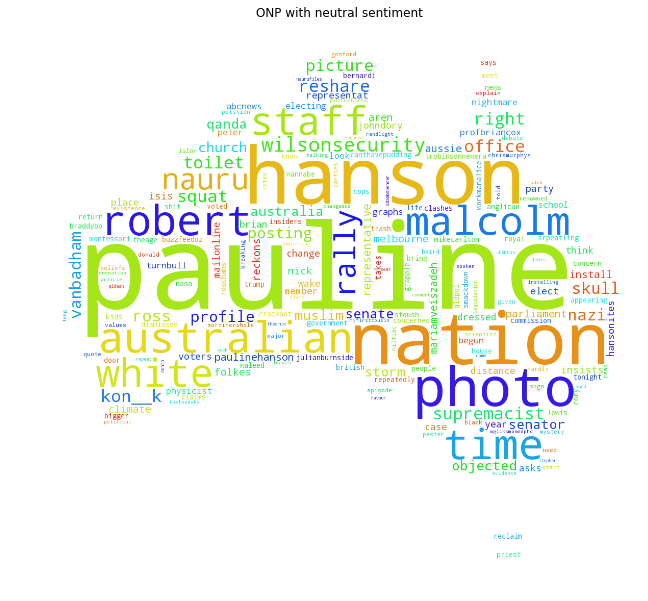

In [24]:
words = " ".join(words_onp_neu_list)

wc = WordCloud(stopwords = STOPWORDS, background_color = 'white', mask = img_mask, 
               width = 1600, height = 1000).generate(words)
plt.imshow(wc)
plt.axis('off')
plt.title("ONP with neutral sentiment")
plt.savefig('wc_onp_neu.png', dpi=300)
plt.show()

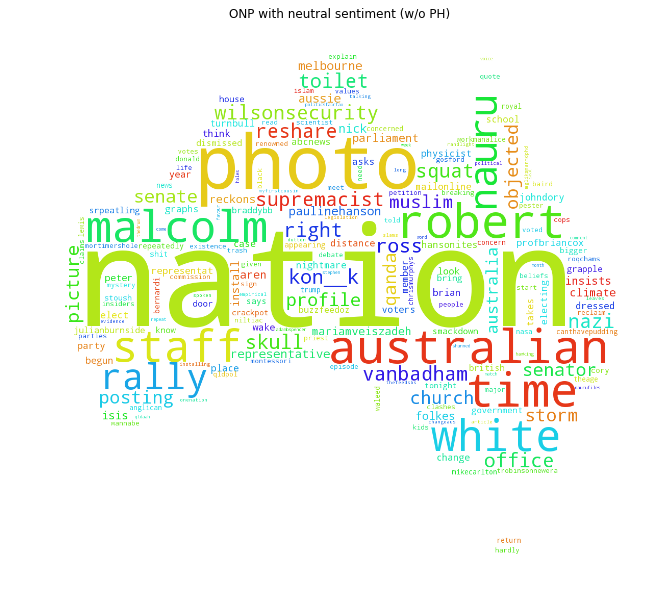

In [25]:
words = " ".join(words_onp_neu_list)

wc = WordCloud(stopwords = more_stopwords, background_color = 'white', mask = img_mask, 
               width = 1600, height = 1000).generate(words)
plt.imshow(wc)
plt.axis('off')
plt.title("ONP with neutral sentiment (w/o PH)")
plt.savefig('wc_onp_neu_wo_ph.png', dpi=300)
plt.show()